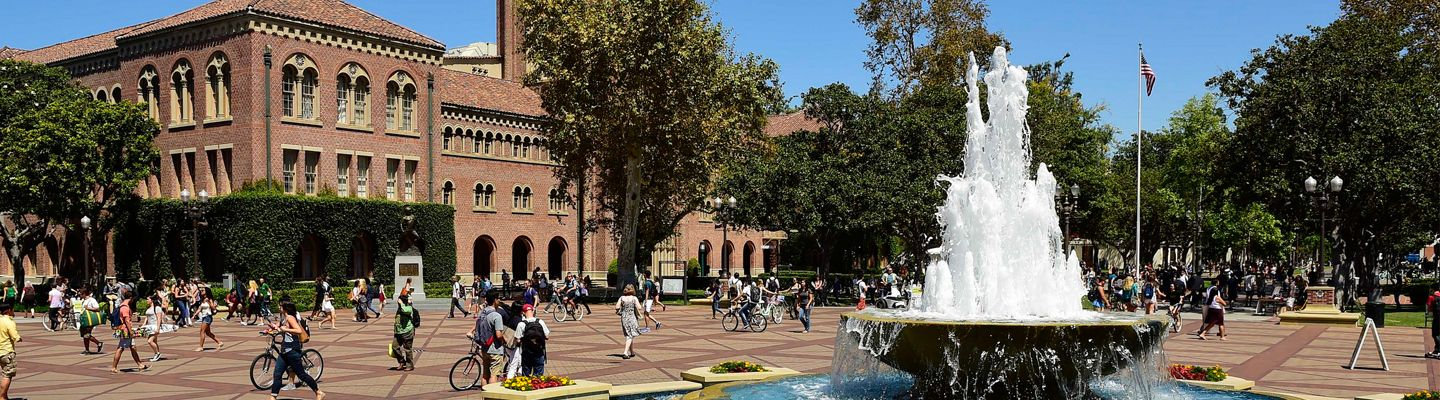

#**Hotel Cancellations Project Notebook**
---
Source: [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import the file**

In [ ]:
#Import the file
from google.colab import files
uploaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [ ]:
#import packages and read csv as DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#**DATA CLEANING AND PREPARATION**

In [ ]:
#Changing wrong dates and converting  to DateTime format
df.loc[~((df['arrival_year'] % 4 == 0) & ((df['arrival_year'] % 100 != 0) | (df['arrival_year'] % 400 == 0))) & (df['arrival_month'] == 2) & (df['arrival_date'] == 29), 'arrival_date'] = 28
df['arrival_datetime'] = pd.to_datetime(df[['arrival_date', 'arrival_month', 'arrival_year']].astype(str).agg('-'.join, axis=1), format='%d-%m-%Y')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_datetime
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


**Create Number of Nights column**

In [ ]:
#Total number of days of booking
df['number_of_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

**Create Booking Cost column**

In [ ]:
#Create Booking cost column
df['booking_cost'] = df['number_of_nights'] * df['avg_price_per_room']

In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'arrival_datetime', 'number_of_nights', 'booking_cost'],
      dtype='object')

In [ ]:
#Check for missing values
missing_values = cd.isnull().sum()
print(missing_values)

In [ ]:
#Check data types
print(df.dtypes)

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,number_of_nights,booking_cost
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.595975,0.025637,0.023349,0.153411,103.423539,0.619655,3.015024,312.812646
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.738941,0.158053,0.368331,1.754171,35.089424,0.786236,1.786017,217.458185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2.000000,176.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,3.000000,270.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,4.000000,392.920000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,24.000000,3910.000000


**Pie chart of booking status distribution**

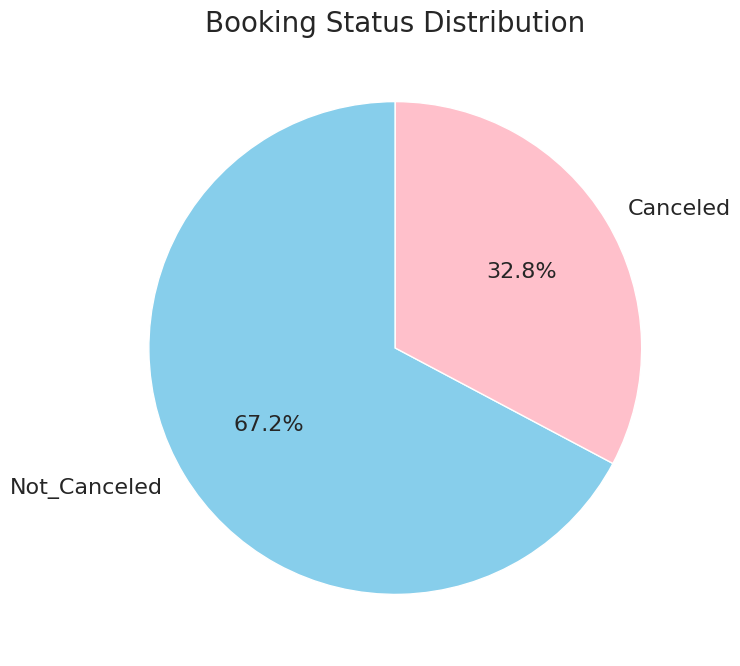

In [ ]:
#Pie chart of booking status distribution
booking_status_counts = df['booking_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'],textprops={'fontsize': 16})
plt.title('Booking Status Distribution',size=20)
plt.show()

We employed a pie chart to visually analyze the distribution of booking outcomes—canceled versus not canceled. Our findings underscore a notable cancellation rate of 32.8%, signifying a substantial portion of lost bookings for the hotel.

In [ ]:
df['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

In [ ]:
df.groupby(['booking_status'])['room_type_reserved'].value_counts().unstack(fill_value=0)

room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
booking_status,,,,,,,
Canceled,9072,228,2,2069,72,406,36
Not_Canceled,19058,464,5,3988,193,560,122


In [ ]:
df.groupby(['booking_status'])['repeated_guest'].value_counts().unstack(fill_value=0)

repeated_guest,0,1
booking_status,,
Canceled,11869,16
Not_Canceled,23476,914


In [ ]:
df.groupby(['booking_status'])['type_of_meal_plan'].value_counts().unstack(fill_value=0)

type_of_meal_plan,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
booking_status,,,,
Canceled,8679,1506,1,1699
Not_Canceled,19156,1799,4,3431


In [ ]:
df.groupby(['booking_status'])['market_segment_type'].value_counts().unstack(fill_value=0)

market_segment_type,Aviation,Complementary,Corporate,Offline,Online
booking_status,,,,,
Canceled,37,0,220,3153,8475
Not_Canceled,88,391,1797,7375,14739


In [ ]:
room_type_cancellations = df.groupby(['booking_status'])['room_type_reserved'].value_counts().unstack(fill_value=0)

**Bar Graph of Number of Room Types by Booking Status**

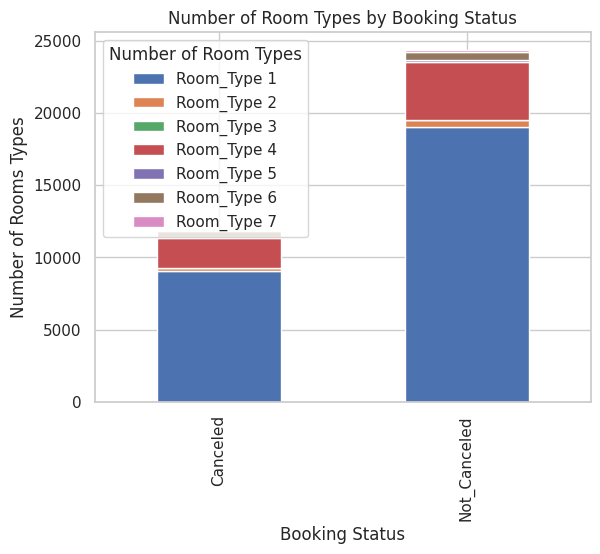

In [ ]:
#Bar Graph of Number of Room Types by Booking Status
room_type_cancellations.plot(kind='bar', stacked=True)
plt.xlabel('Booking Status')
plt.ylabel('Number of Rooms Types')
plt.title('Number of Room Types by Booking Status')
plt.legend(title='Number of Room Types',loc='upper left')
plt.show()

**Pie Chart of Percentage of Cancellations by Market Segment Type**

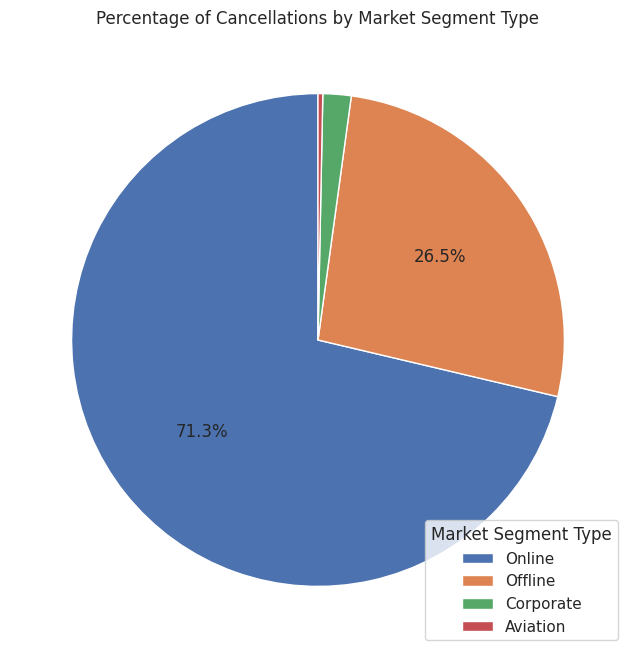

In [ ]:
#Pie Chart of Percentage of Cancellations by Market Segment Type
canceled_df = df[df['booking_status'] == 'Canceled']
percentage_cancellations = canceled_df['market_segment_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_cancellations, labels=None, autopct=lambda p: f'{p:.1f}%' if p > 2 else '', startangle=90)
plt.legend(title='Market Segment Type', labels=percentage_cancellations.index, loc='lower right')
plt.title('Percentage of Cancellations by Market Segment Type')
plt.show()


Our investigation extended to identifying the primary market segment contributing to a significant number of cancellations. Our analysis uncovered a noteworthy trend, with approximately 71% of cancellations attributed to the online market, while the offline market accounted for only 26.5% of cancellations. This finding underscores the disproportionate impact of cancellations from the online market segment, highlighting a potential area for targeted interventions or strategies to mitigate cancellations in this specific market domain.

**Pie Chart of Percentage of Cancellations by Meal Plan Type**

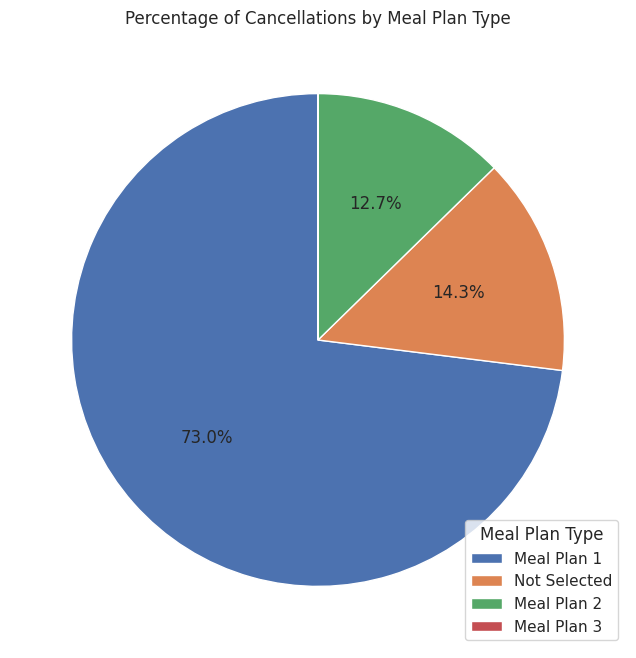

In [ ]:
#Pie Chart of Percentage of Cancellations by Meal Plan Type
canceled_df = df[df['booking_status'] == 'Canceled']
percentage_cancellations = canceled_df['type_of_meal_plan'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_cancellations, labels=None, autopct=lambda p: f'{p:.1f}%' if p > 2 else '', startangle=90)
plt.legend(title='Meal Plan Type', labels=percentage_cancellations.index, loc='lower right')
plt.title('Percentage of Cancellations by Meal Plan Type')
plt.show()


**Bar Graph of Number of Adults by Booking Status**

In [ ]:
adult = df.groupby(['booking_status'])['no_of_adults'].value_counts(normalize=True).unstack(fill_value=0)

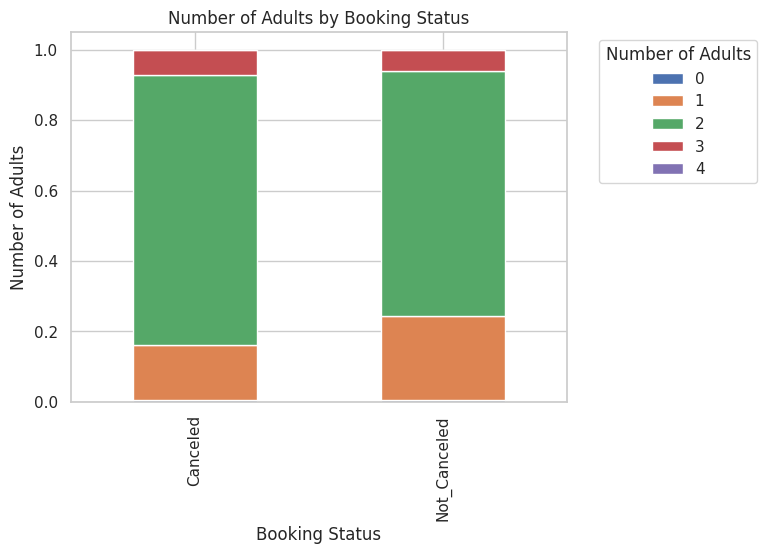

In [ ]:
adult.plot(kind='bar', stacked=True)
plt.xlabel('Booking Status')
plt.ylabel('Number of Adults')
plt.title('Number of Adults by Booking Status')
plt.legend(title='Number of Adults', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Bar Graph of Number of Children by Booking Status**

In [ ]:
child = df.groupby(['booking_status'])['no_of_children'].value_counts(normalize=True).unstack(fill_value=0)

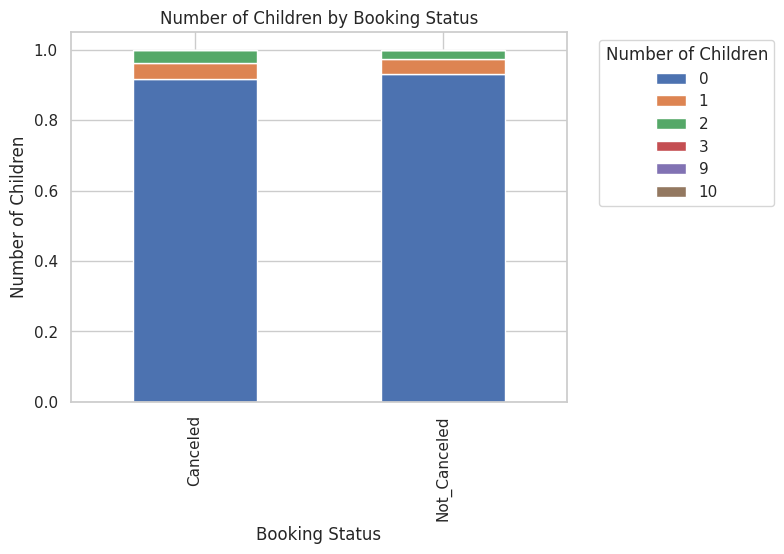

In [ ]:
#Bar Graph of Number of Children by Booking Status
child.plot(kind='bar', stacked=True)
plt.xlabel('Booking Status')
plt.ylabel('Number of Children')
plt.title('Number of Children by Booking Status')
plt.legend(title='Number of Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Our objective was to delve into the customer demographics associated with hotel bookings. To achieve this, we employed a stacked bar plot, comparing the number of adults and children against the booking status (Canceled and Not_Canceled). Our analysis revealed a prevailing trend where bookings predominantly featured two adults, and notably, nearly 90% of the bookings did not include children. This insight sheds light on the predominant composition of bookings in terms of adult occupancy and the prevalence of child-free reservations.

In [ ]:
df.groupby(['booking_status'])['no_of_special_requests'].value_counts(normalize=True).unstack(fill_value=0)

no_of_special_requests,0,1,2,3,4,5
booking_status,,,,,,
Canceled,0.718973,0.227430,0.053597,0.000000,0.000000,0.000000
Not_Canceled,0.460517,0.355474,0.152809,0.027675,0.003198,0.000328


**Bar Graph of Number of Special Requests by Booking Status**

In [ ]:
#Bar Graph of Number of Special Requests by Booking Status
normalized_counts = df.groupby(['booking_status'])['no_of_special_requests'].value_counts(normalize=True).unstack(fill_value=0)
df_long = normalized_counts.reset_index().melt(id_vars='booking_status', var_name='no_of_special_requests', value_name='normalized_count')

fig = px.bar(df_long, x='no_of_special_requests', color='booking_status', y='normalized_count',
             title='Number of Special Requests by Booking Status',
             labels={'normalized_count': 'Normalized Count', 'no_of_special_requests': 'Number of Special Requests'},
             barmode='stack')
fig.update_layout(title=dict(x=0.5))
fig.show()

We also wanted to understand how involved a customer is with their booking. From our personal experiences we had an assumption that the more invested you are in your booking, make special requests, the less likely you are to cancel that booking. The stacked bar chart below the shows the relationship between number of booking canceled or not canceled and the number of special requests made. It is in line with our assumption that, as the number of special requests increases, the number of bookings decreases.

**Bar Chart of the Count of Bookings by Number of Nights and Booking Status**

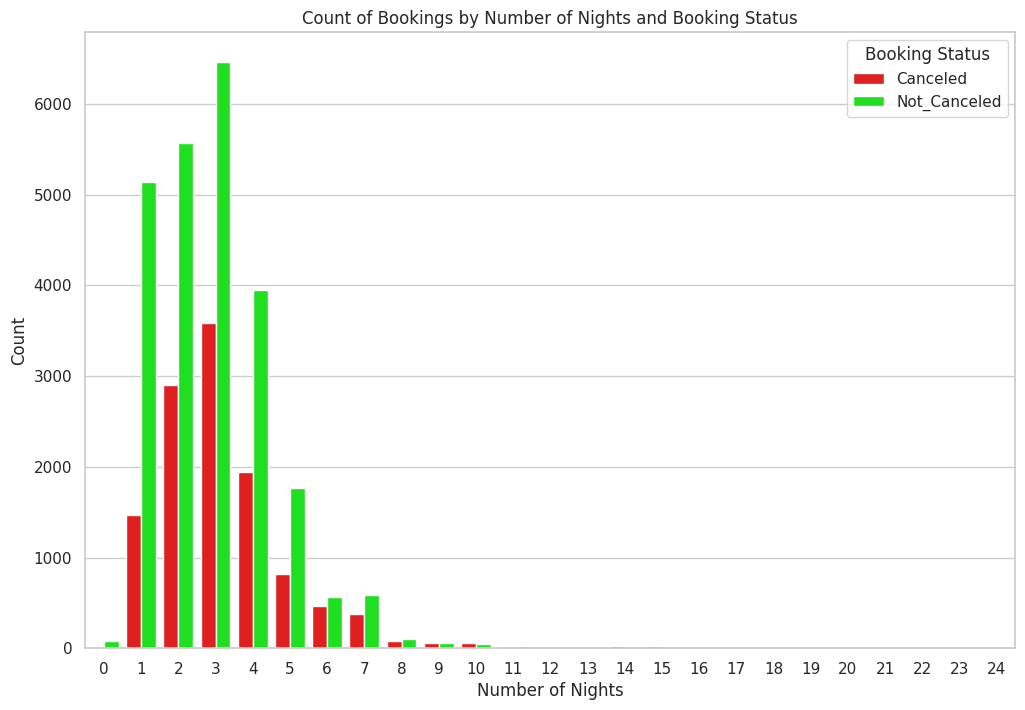

In [ ]:
#Bar Chart of the Count of Bookings by Number of Nights and Booking Status
night = df.groupby(['booking_status'])['number_of_nights'].value_counts().unstack(fill_value=0)
night = night.reset_index()
night_long = pd.melt(night, id_vars='booking_status', var_name='number_of_nights', value_name='count')

plt.figure(figsize=(12, 8))
original_palette = ["#FF0000", "#00FF00"]
sns.barplot(data=night_long, x='number_of_nights', y='count', hue='booking_status', palette=original_palette)
plt.xlabel('Number of Nights')
plt.ylabel('Count')
plt.title('Count of Bookings by Number of Nights and Booking Status')
plt.legend(title='Booking Status')
plt.show()

**Violin Chart For the Distribution of Number of Nights by Booking Status**

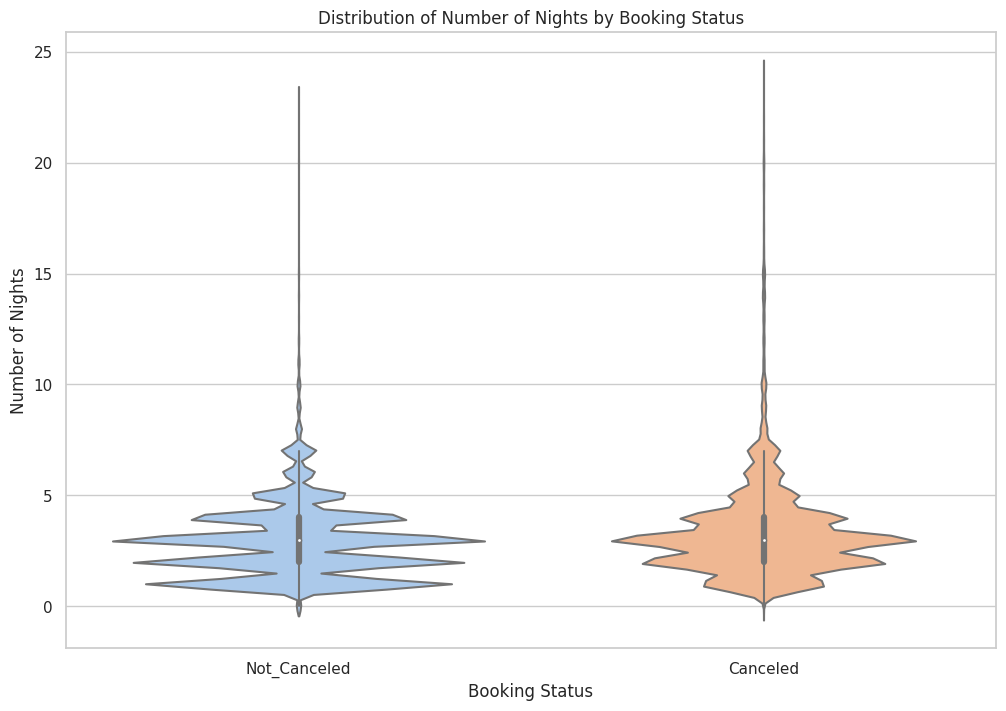

In [ ]:
#Violin Chart for the Distribution of Number of Nights by Booking Status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.violinplot(x='booking_status', y='number_of_nights', data=df, palette='pastel')
plt.xlabel('Booking Status')
plt.ylabel('Number of Nights')
plt.title('Distribution of Number of Nights by Booking Status')
plt.show()

**Violin Chart For the Distribution of Average Price Per Room by Booking Status**

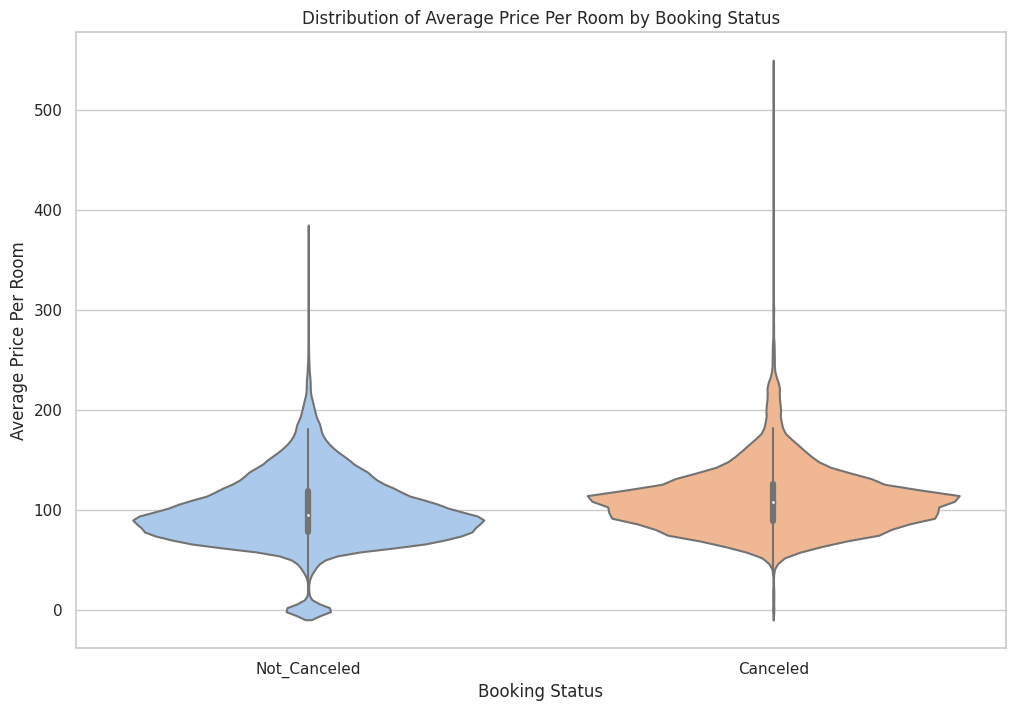

In [ ]:
#Violin Chart for the Distribution of Average Price Per Room by Booking Status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.violinplot(x='booking_status', y='avg_price_per_room', data=df, palette='pastel')
plt.xlabel('Booking Status')
plt.ylabel('Average Price Per Room')
plt.title('Distribution of Average Price Per Room by Booking Status')
plt.show()

**Line Graph of the Number of Cancellations and Non-Cancellations per Day**

In [ ]:
#Line Graph of the Number of Cancellations and Non-Cancellations per Day
df['date'] = df['arrival_datetime'].dt.date
df_count = df.groupby(['date', 'booking_status']).size().reset_index(name='count')

fig = px.line(df_count, x='date', y='count', color='booking_status',
              labels={'count': 'Number of Bookings', 'date': 'Date'},
              title='Number of Cancellations and Non-Cancellations per Day',
              line_shape='linear',
              color_discrete_map={'Canceled': 'rgba(225, 0, 0, 0.75)', 'Not_Canceled': 'rgba(0, 0, 225, 0.75)'})

fig.update_layout(
    title=dict(text='Number of Cancellations and Non-Cancellations per Day', font=dict(size=20)),
    xaxis=dict(title=dict(text='Date', font=dict(size=16))),
    yaxis=dict(title=dict(text='Number of Bookings', font=dict(size=16))),
    legend=dict(title=dict(text='Booking Status', font=dict(size=16))),)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

Since this is a time series dataset, we can investigate any potential seasonal patterns and anomalies by plotting bookings over time. In the line graph below we can see the total number of daily canceled and non-canceled booking over time. We can see an anomalous trend from November 2017 - February 2018 where there are little to no booking cancellations made. This could be due to the hotel testing with not allowing cancellations for booking made for that period. We can see a high volatility of cancelations from May 2018 to July 2018 which is during a summer which is usually a busy vacation season. Summer also has the largest spike in total cancellations. We can also see high volatility from September 2018 - November 2018 which could be customer planning and finding better deals for the December holiday season.

**Line Graph of the Average Price per Room for Canceled and Non-canceled Bookings**

In [ ]:
#Line Graph of the Average Price per Room for Canceled and Non-canceled Bookings
import plotly.express as px

df['date'] = df['arrival_datetime'].dt.date
df_avg_price = df.groupby(['date', 'booking_status']).agg({'avg_price_per_room': 'mean'}).reset_index()

fig = px.line(df_avg_price, x='date', y='avg_price_per_room', color='booking_status',
              labels={'avg_price_per_room': 'Avg Price per Room', 'date': 'Date'},
              title='Line Plot with Avg Price per Room for Canceled and Not Canceled',
              hover_name='date', hover_data={'avg_price_per_room': ':.2f'},
              line_shape='linear',
              color_discrete_map={'Canceled': 'rgba(225, 0, 0, 0.9)', 'Not_Canceled': 'rgba(0, 225, 0, 0.9)'})

fig.update_layout(
    title=dict(text='Average Price per Room for Canceled and Non-canceled Bookings', font=dict(size=20)),
    xaxis=dict(title=dict(text='Date', font=dict(size=16))),
    yaxis=dict(title=dict(text='Avg Price per Room', font=dict(size=16))),
    legend=dict(title=dict(text='Booking Status', font=dict(size=16))),)

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

Now that we have an understanding of the seasonality of cancelations we can see how this might affect a hotel company. First we would need to also understand the trends in the average room price per day. The line graph below allows us to better understand possible customer behaviour and price sensitivity. When prices are lower there is a higher volatility in cancelations that could indicate customers canceling as they find better prices. There is a huge spike for 3 separate days in mid-Sepetember reaching 150 cancellations. This could be anomalous due to a large party of customers canceling. There is another major spike right before New Years 2017 which could be customers canceling expensive bookings for cheaper last minute booking options. The greatest sustained volatility is in the summer vacation season.

**The Line Graph of Booking Cost for Canceled and Non-cancelled Bookings**

In [ ]:
#The Line Graph of Booking Cost for Canceled and Non-cancelled Bookings
df['date'] = df['arrival_datetime'].dt.date
df_booking_cost = df.groupby(['date', 'booking_status']).agg({'booking_cost': 'sum'}).reset_index()
df_booking_cost.loc[df_booking_cost['booking_status'] == 'Canceled', 'booking_cost'] *= -1

fig = px.line(df_booking_cost, x='date', y='booking_cost', color='booking_status',
              labels={'booking_cost': 'Booking Cost', 'date': 'Date'},
              title='Booking Cost for Canceled and Non-cancelled Bookings',
              hover_name='date', hover_data={'booking_cost': ':.2f'},
              line_shape='linear',
              color_discrete_map={'Canceled': 'rgba(225, 0, 0, 0.9)', 'Not_Canceled': 'rgba(0, 225, 0, 0.9)'})

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

Finally with this information we can take a deeper look into the actual potential revenue loss from these cancelation booking compared to non-canceled bookings. In the line graph below we can see multiple spikes of large potential revenue loss possibly due to large changes in average room price. The greatest loss is around the summer vacation season. The summer season is the costliest to this hotel and would be the toughests season to manage budgets, rebooking, offers, pricing and avaialbiity planning.

**Boxplot of Average Price per Room - Canceled vs. Not Canceled**

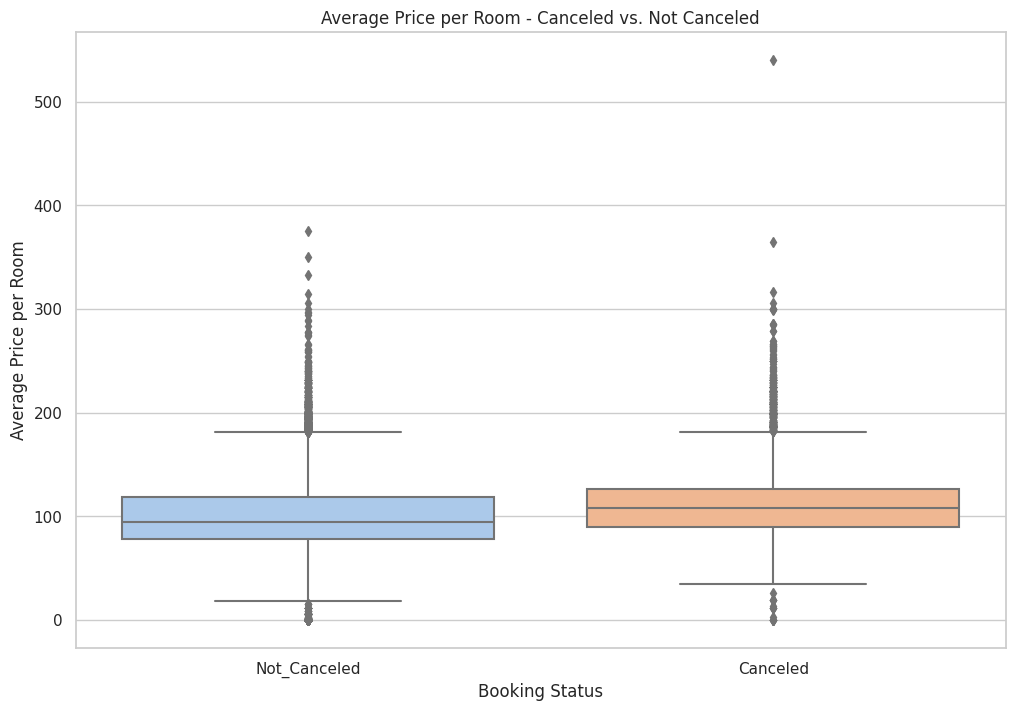

In [ ]:
#Boxplot of Average Price per Room - Canceled vs. Not Canceled
plt.figure(figsize=(12, 8))
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df, palette='pastel')
plt.title('Average Price per Room - Canceled vs. Not Canceled')
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.show()


**Bar Graph Canceled Bookings by Arrival Month**

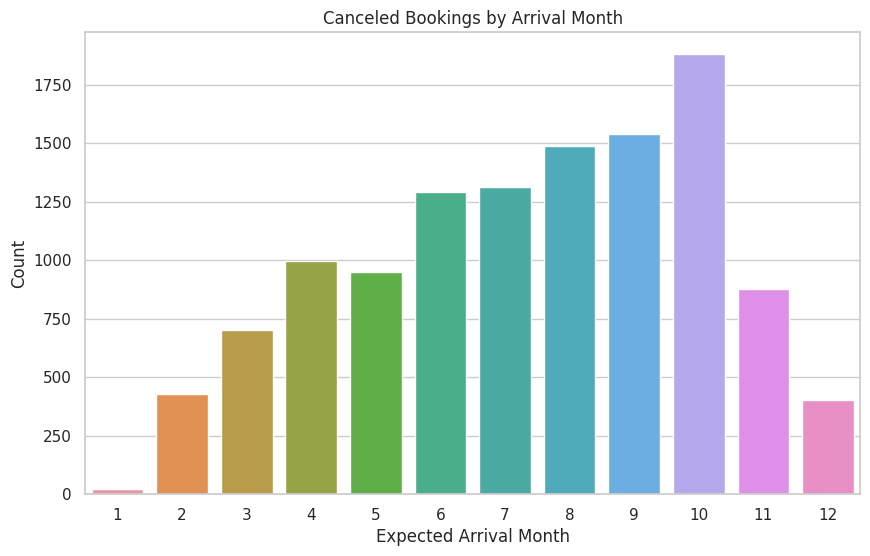

In [ ]:
#Bar Graph Canceled Bookings by Arrival Month
canceled_bookings = df[df['booking_status'] == 'Canceled']

plt.figure(figsize=(10, 6))
sns.countplot(data=canceled_bookings, x='arrival_month')
plt.title('Canceled Bookings by Arrival Month')
plt.xlabel('Expected Arrival Month')
plt.ylabel('Count')
plt.show()

Our inquiry extended to discerning the seasonality trends regarding cancellations over two years. Through the visualization of a bar chart, we identified a pattern wherein the number of cancellations escalated progressively, reaching a peak in October—the onset of the holiday season. Conversely, the month of January exhibited the lowest number of cancellations. This temporal analysis provides valuable insights into the fluctuating patterns of cancellations throughout the year, enabling strategic considerations for managing booking cancellations effectively.

By segmenting the canceled booking by expected arrival month we can see that cancellations rise through the year with a peak in October. Cancellations are therefore impacted by seasonality.
Conisdering the nature of the hospitalioty business this is understandable.

**Bar Graph of Canceled Bookings by Lead Time With a Trendline**

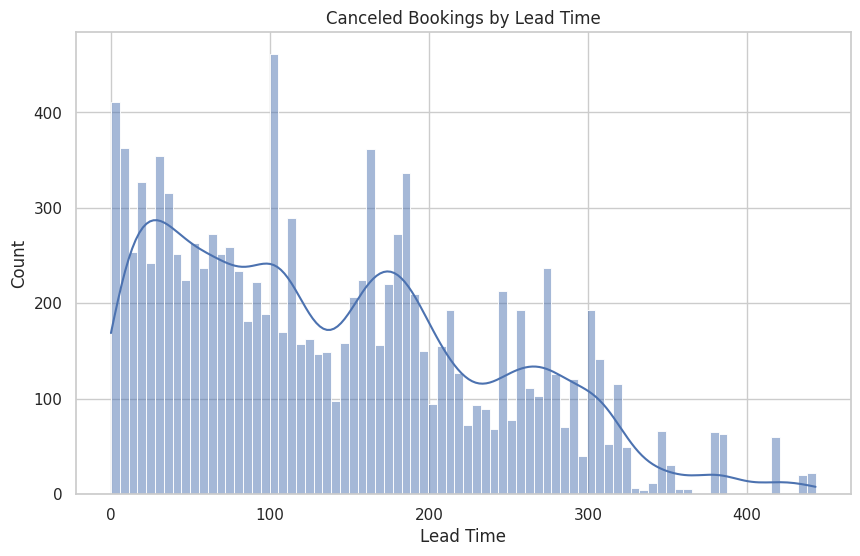

In [ ]:
#Bar Graph of Canceled Bookings by Lead Time With a Trendline
canceled_bookings = df[df['booking_status'] == 'Canceled']

plt.figure(figsize=(10, 6))
sns.histplot(data=canceled_bookings, x='lead_time', bins=80, kde=True)

plt.title('Canceled Bookings by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()

To better investigate booking cancellations we wanted to understand how long these customers have had to make their cancellations. We created a bar chart with a trend line that shows the relationship between lead time and the number of cancellations made. The lead time is the time between reservation and the arrival date of the booking. We can see that as the lead time increases (customers book more in advance), the number of total cancellation has decreased. This could also be because there are fewer booking made with a longer lead time. We can see some anomalous spikes around 100 days, 150 days and 180 days, which could be due to better prices or other factors not captured by the dataset.


**Bar Graph of Canceled Bookings by Market Segment**

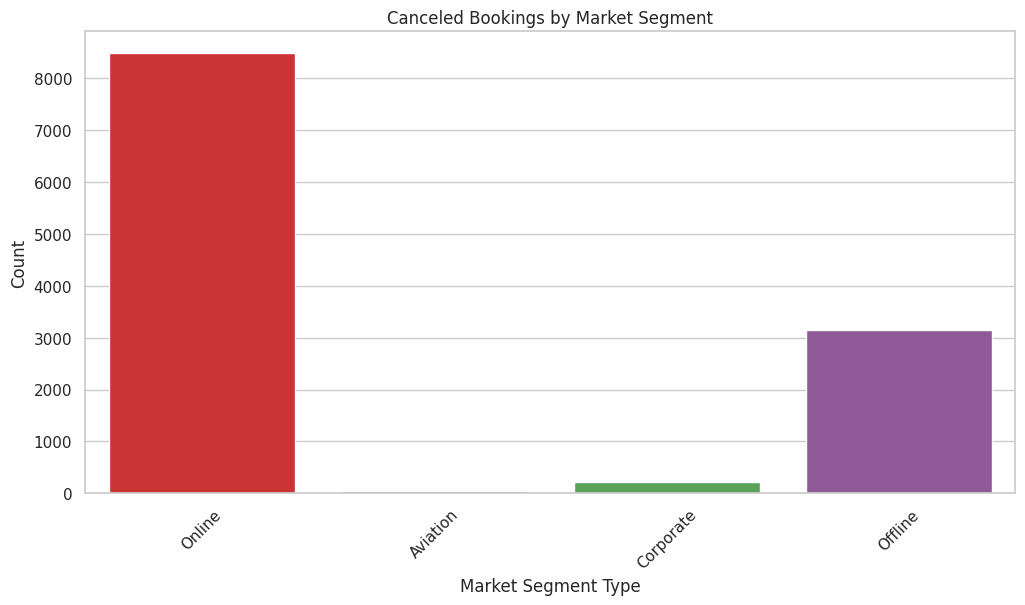

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=canceled_bookings, x='market_segment_type', palette='Set1')

plt.title('Canceled Bookings by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
repeated_guest_percentage = canceled_bookings['repeated_guest'].value_counts(normalize=True)
repeated_guest_percentage

0    0.998654
1    0.001346
Name: repeated_guest, dtype: float64

# DECISION TREE PREDICTIVE MODEL

**Create and fit the Decision Tree Model and its Ouput**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(['booking_status', 'Booking_ID', 'date'], axis=1)
y = df['booking_status']

X = pd.get_dummies(X, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=43, max_depth=13,min_samples_split=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix:
[[1947  469]
 [ 420 4419]]

Classification Report:
              precision    recall  f1-score   support

    Canceled       0.82      0.81      0.81      2416
Not_Canceled       0.90      0.91      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255



**Visualizing the Decision Tree**

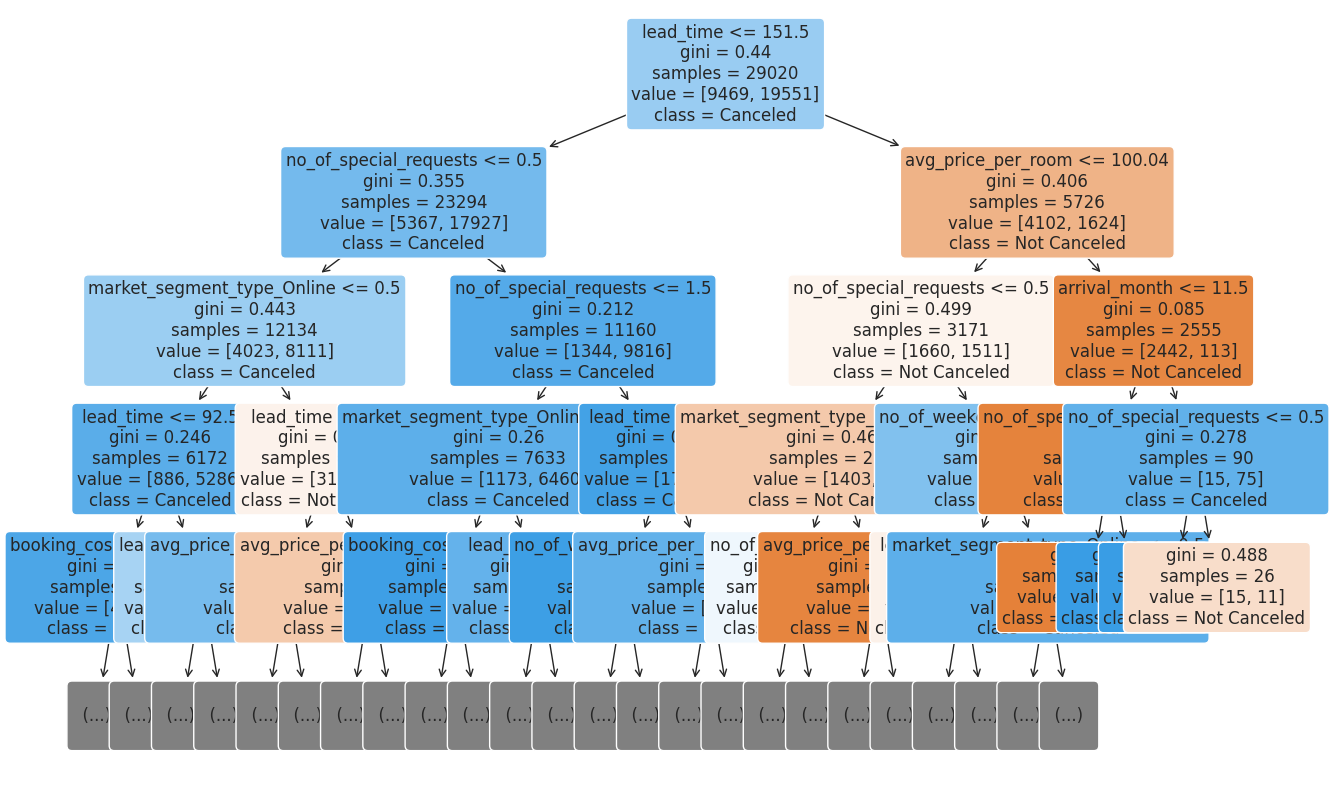

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True, rounded=True, max_depth=4, fontsize=12)
plt.show()

**Visualize the Feature Importance**

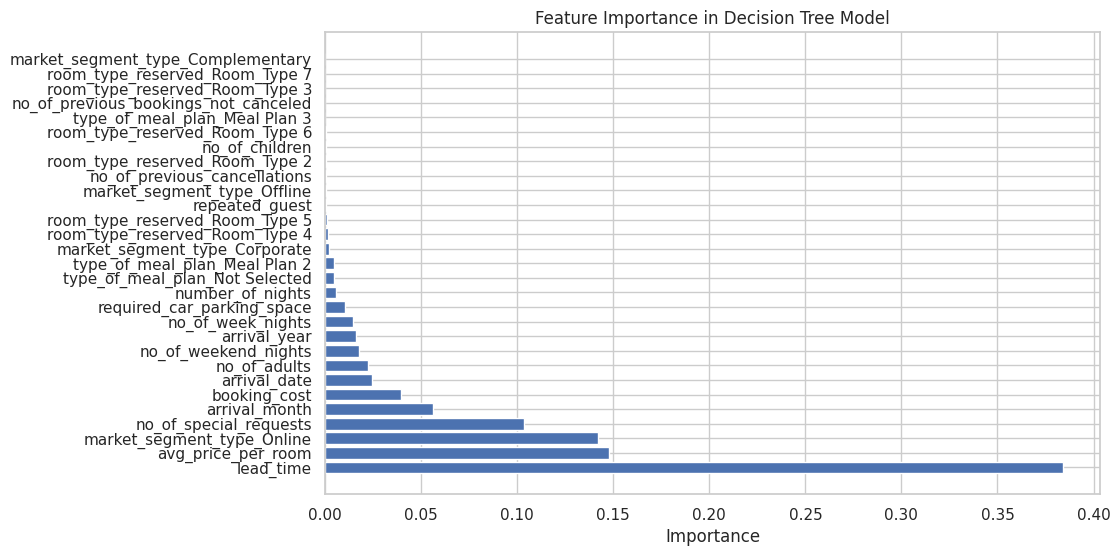

In [ ]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


**Showing the top 10 variables**

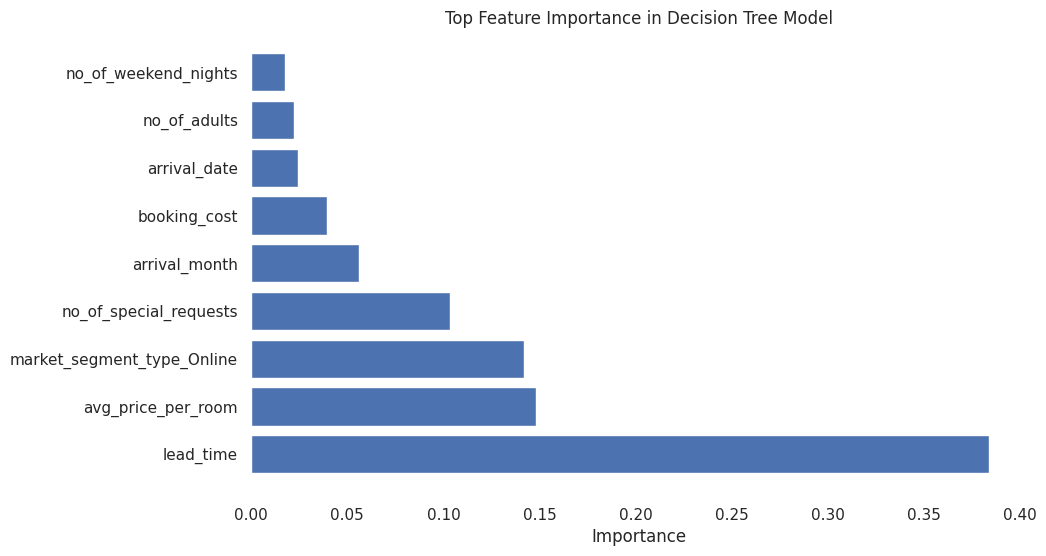

In [ ]:
#Showing the top 9 variables
top_n = 9
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(10, 6))
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.grid(False)
plt.grid(False)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title(f'Top Feature Importance in Decision Tree Model')
plt.show()


**Visualize the Confusion Matrix**

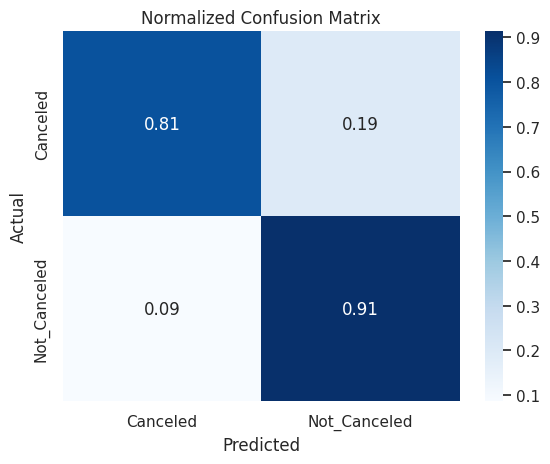

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(normalized_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Canceled', 'Not_Canceled'], yticklabels=['Canceled', 'Not_Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
len(df['booking_status'])

36275

**Total Cost of Type 1 and Type 2 Errors**

In [ ]:
average_cost_confirmed = df[df['booking_status'] == 'Not_Canceled']['avg_price_per_room'].mean()
average_cost_canceled = df[df['booking_status'] == 'Canceled']['avg_price_per_room'].mean()

average_price_per_room = 10
percentage_type_1_error = 0.19
percentage_type_2_error = 0.09
total_reservations = 36275
canceled_bookings = 11885

# Use confirmed room price for Type 1 Error
cost_type_1_error = average_cost_confirmed * percentage_type_1_error
# Use canceled room price for Type 2 Error
cost_type_2_error = average_cost_canceled * percentage_type_2_error

total_cost_type_1_error = cost_type_1_error * canceled_bookings
total_cost_type_2_error = cost_type_2_error * (total_reservations - canceled_bookings)

print(f'Total cost of Type 1 Error: ${total_cost_type_1_error:.2f}')
print(f'Total cost of Type 2 Error: ${total_cost_type_2_error:.2f}')

Total cost of Type 1 Error: $225660.12
Total cost of Type 2 Error: $242756.04


**Bar Graph of the Total Cost of Type 1 and Type 2 Errors**

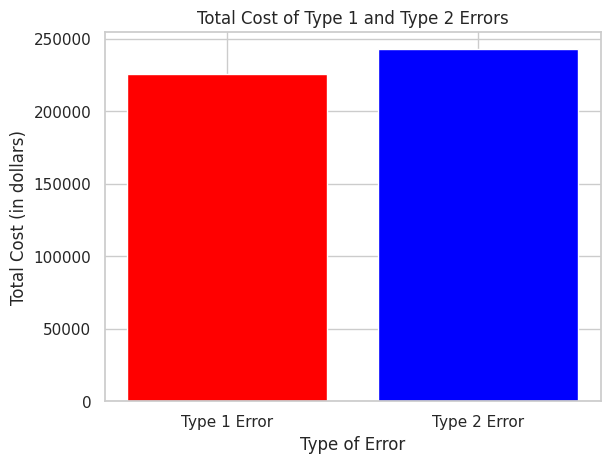

In [ ]:
#Bar Graph of the Total Cost of Type 1 and Type 2 Errors
types_of_errors = ['Type 1 Error', 'Type 2 Error']
total_costs = [total_cost_type_1_error, total_cost_type_2_error]

plt.bar(types_of_errors, total_costs, color=['red', 'blue'])
plt.xlabel('Type of Error')
plt.ylabel('Total Cost (in dollars)')
plt.title('Total Cost of Type 1 and Type 2 Errors')
plt.show()